<IPython.core.display.Javascript object>


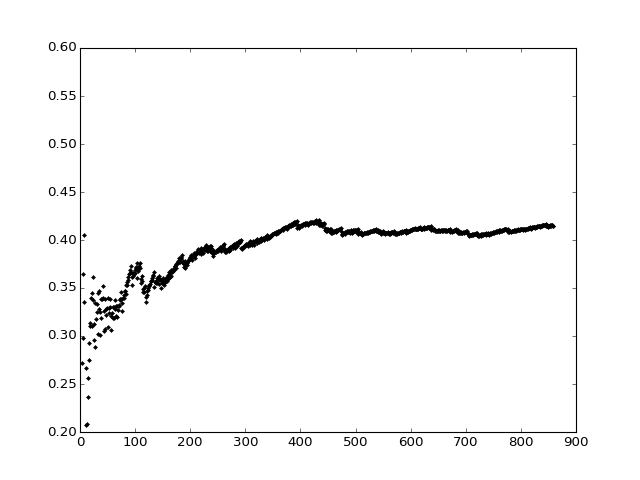

In [40]:
#1a D*D*D*D*D
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

ITER = 1000

def foltowmap(x1,x2,x3):
    return (3.8 * x1 * (1.-x1) - 0.05 * (x2 + 0.35) * (1.-2.*x3),
            0.1 * ((x2 + 0.35) * (1.-2.*x3) - 1) * (1. - 1.9 * x1),
            3.78 * x3 * (1. - x3) + 0.2 * x2)

def Dfoltowmap(x1, x2, x3):
    return np.array( [ [3.8 * (1 - x1) - 3.8 * x1 , -0.05 * (1 - 2 * x3) , 0.1 * (x2 + 0.35)],
                         [-0.19 * ((x2 + 0.35) * (1 - 2 * x3) - 1) , 0.1 * (1 - 1.9 * x1) * (1 - 2 * x3) , -0.2 * (1 - 1.9 * x1) * (x2 + 0.35)],
                         [0 , 0.2 , 3.78 * (1 - x3) - 3.78 * x3 ] ] )
x1 = 0.5
x2 = 0
x3 = 0
D = Dfoltowmap(x1,x2,x3)
y1 = 0.1
y2 = 0
y3 = 0

plt.figure()
plt.ylim([0.2,0.6])

for i in range(0,ITER):
    x1,x2,x3 = foltowmap(x1,x2,x3)
    D = np.dot(Dfoltowmap(x1,x2,x3), D)
    yn = np.dot(D, np.array([y1,y2,y3]))
    lamda1 = np.log(np.sqrt(np.dot(yn,yn)) / 
                    np.sqrt((y1*y1 + y2*y2 + y3*y3)))/(i+1)
    #print(np.dot(yn,yn))
    #if np.mod(i,10) == 0 : print( i, np.dot(yn,yn))
    plt.plot( i, lamda1 ,'.k')
plt.show()
 

<IPython.core.display.Javascript object>


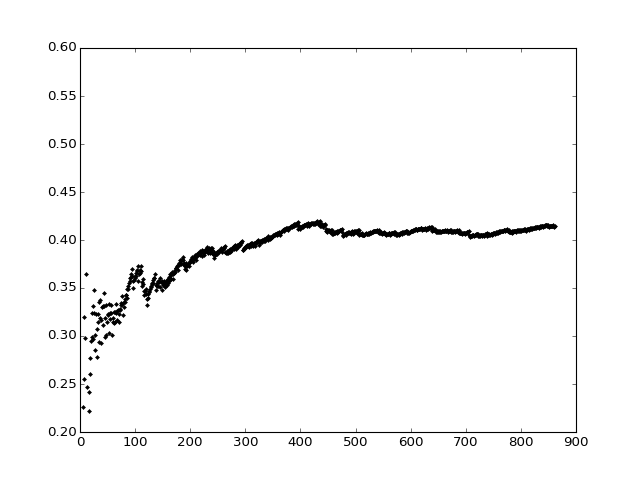

In [2]:
#1a yn = Dyn-1
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

ITER = 1000

def foltowmap(x1,x2,x3):
    return (3.8 * x1 * (1.-x1) - 0.05 * (x2 + 0.35) * (1.-2.*x3),
            0.1 * ((x2 + 0.35) * (1.-2.*x3) - 1) * (1. - 1.9 * x1),
            3.78 * x3 * (1. - x3) + 0.2 * x2)

def Dfoltowmap(x1, x2, x3):
    return np.array( [ [3.8 * (1 - x1) - 3.8 * x1 , -0.05 * (1 - 2 * x3) , 0.1 * (x2 + 0.35)],
                         [-0.19 * ((x2 + 0.35) * (1 - 2 * x3) - 1) , 0.1 * (1 - 1.9 * x1) * (1 - 2 * x3) , -0.2 * (1 - 1.9 * x1) * (x2 + 0.35)],
                         [0 , 0.2 , 3.78 * (1 - x3) - 3.78 * x3 ] ] )
x1 = 0.5
x2 = 0
x3 = 0
D = Dfoltowmap(x1,x2,x3)
y1 = 0.1
y2 = 0
y3 = 0
yn = np.dot(D,np.array([y1,y2,y3]))

plt.figure()
plt.ylim([0.2,0.6])

for i in range(1,ITER+1):
    x1,x2,x3 = foltowmap(x1,x2,x3)
    D = Dfoltowmap(x1,x2,x3)
    yn = np.dot(D, yn)
    lamda1 = np.log(np.sqrt(np.dot(yn,yn)) / 
                    np.sqrt((y1*y1 + y2*y2 + y3*y3)))/(i+1)
    #print(np.dot(yn,yn))
    #if np.mod(i,10) == 0 : print( i, lamda1)
    plt.plot( i+1, lamda1 ,'.k')
plt.show()
     

<IPython.core.display.Javascript object>


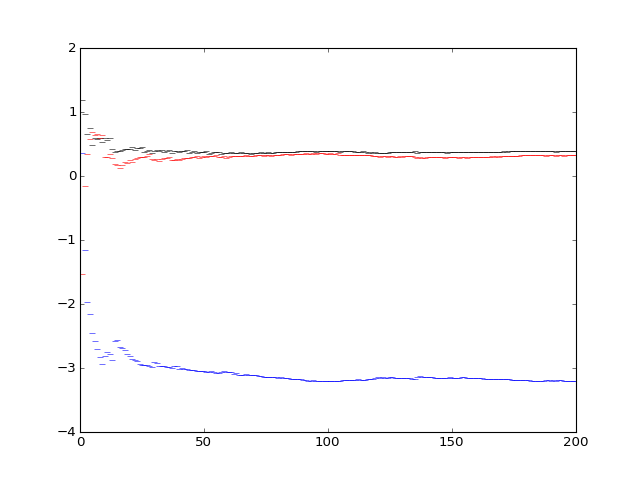

[ 0.39178308  0.32634184 -3.20403148]


In [37]:
#1b
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

ITER = 200

def foltowmap(x1,x2,x3):
    return (3.8 * x1 * (1.-x1) - 0.05 * (x2 + 0.35) * (1.-2.*x3),
            0.1 * ((x2 + 0.35) * (1.-2.*x3) - 1) * (1. - 1.9 * x1),
            3.78 * x3 * (1. - x3) + 0.2 * x2)

def Dfoltowmap(x1, x2, x3):
    return np.array( [ [3.8 * (1 - x1) - 3.8 * x1 , -0.05 * (1 - 2 * x3) , 0.1 * (x2 + 0.35)],
                         [-0.19 * ((x2 + 0.35) * (1 - 2 * x3) - 1) , 0.1 * (1 - 1.9 * x1) * (1 - 2 * x3) , -0.2 * (1 - 1.9 * x1) * (x2 + 0.35)],
                         [0 , 0.2 , 3.78 * (1 - x3) - 3.78 * x3 ] ] )

x1 = 0.5
x2 = 0
x3 = 0
y1 = np.array([1,0,0])
y2 = np.array([0,1,0])
y3 = np.array([0,0,1])
Q = np.array([y1,y2,y3])
Rn = np.diag(Q)

plt.figure()
for i in range(1,ITER+1):
    x1,x2,x3 = foltowmap(x1,x2,x3)
    D = Dfoltowmap(x1, x2, x3)
    Q,R = np.linalg.qr(np.dot(D,Q))
    Rn = Rn * np.diag(R)
    lya = np.log(abs(Rn))/i
    plt.plot( i, lya[0] ,'_k')
    plt.plot( i, lya[1] ,'r_')
    plt.plot( i, lya[2] ,'_b')
plt.show()
print(lya)